In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# get HCFAI

In [2]:
# Specify the path to your CSV file
# data_path = 'E:\\THESIS\\MS\\Data Collection - Preparation\\rg1-revised-cleaned-with-popcount-and-neighbors.csv'
region = 9
data_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_cleaned_sum.csv'
df = pd.read_csv(data_path)
df.head(2)

,ID,barangay_name,city_name,province_name,children_m,elderly_me,women_mean,youth_mean,women_repr,phall_mean,...,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,youth_children_sum,youth_elderly_sum,youth_phall_sum,youth_women_sum,youth_women_repr_sum,youth_youth_sum
0,3313430,Maragat,San Vicente,Northern Samar,NaN,NaN,NaN,NaN,NaN,2.633395,...,0,0,3330011,19.160349,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
1,3314812,Maragat,San Vicente,Northern Samar,2.729894,4.98314,15.72939,5.286462,6.586411,1.111227,...,0,0,3330011,16.402226,10.919576,19.93256,124.968488,62.91756,26.345644,21.145848


In [3]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name', 'children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'phall_mean',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'youth_children_sum',
       'youth_elderly_sum', 'youth_phall_sum', 'youth_women_sum',
       'youth_women_repr_sum', 'youth_youth_sum'],
      dtype='object')

In [4]:
# Rename columns
column_mapping = {
    'youth_children_sum': 'popden_chi',
    'youth_elderly_sum': 'popden_eld',
    'youth_women_sum': 'popden_wom',
    'youth_women_repr_sum': 'popden_w_1',
    'youth_youth_sum': 'popden_you',
    'youth_phall_sum': 'popden_all',
}


df = df.rename(columns=column_mapping)
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df[df['RHU_Presence'] == 1]

dropcols = ['children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'phall_mean']
df = df.drop(columns=dropcols)

# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [5]:
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you
0,3313430,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,NaN,0,0,0,3330011,19.160349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3314812,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,NaN,0,0,0,3330011,16.402226,10.919576,19.932560,124.968488,62.917560,26.345644,21.145848
2,3314813,Sila,San Vicente,Northern Samar,1.470177,1.547435,0.429685,NaN,0,0,0,3330011,17.733638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3316193,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,NaN,0,0,0,3330011,15.696258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3316194,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,NaN,0,0,0,3330011,15.889344,2.360123,4.308162,27.010301,13.598806,5.694266,4.570398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8981,3504237,Ngolos,Guiuan,Eastern Samar,3.142842,1.754262,0.584311,NaN,0,0,0,3460006,46.986907,0.984148,0.680468,7.912546,3.801621,1.782713,1.366559
8982,3505637,Cagusu-an,Guiuan,Eastern Samar,2.160672,1.754547,0.564089,NaN,0,0,0,3460006,62.553435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8983,3507003,Sulangan,Guiuan,Eastern Samar,3.232944,1.746120,0.587511,NaN,0,0,0,3460006,50.731541,118.603833,84.144597,999.317445,505.669059,212.364957,147.453414
8984,3518072,Suluan,Guiuan,Eastern Samar,2.965111,1.737982,0.569467,NaN,0,0,0,3460006,70.953292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [7]:
# Impute NaNs with 0, considering data type safety
for col in columns_with_nan:
    # Check data type before imputing (avoid unintended conversions)
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)  # Impute with 0 for numeric columns
    else:
        df[col] = df[col].fillna('NA')  # Impute with 'NA' for non-numeric columns
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you
0,3313430,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,0,3330011,19.160349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3314812,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,0,3330011,16.402226,10.919576,19.932560,124.968488,62.917560,26.345644,21.145848
2,3314813,Sila,San Vicente,Northern Samar,1.470177,1.547435,0.429685,0.0,0,0,0,3330011,17.733638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3316193,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,0,3330011,15.696258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3316194,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,0,3330011,15.889344,2.360123,4.308162,27.010301,13.598806,5.694266,4.570398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8981,3504237,Ngolos,Guiuan,Eastern Samar,3.142842,1.754262,0.584311,0.0,0,0,0,3460006,46.986907,0.984148,0.680468,7.912546,3.801621,1.782713,1.366559
8982,3505637,Cagusu-an,Guiuan,Eastern Samar,2.160672,1.754547,0.564089,0.0,0,0,0,3460006,62.553435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8983,3507003,Sulangan,Guiuan,Eastern Samar,3.232944,1.746120,0.587511,0.0,0,0,0,3460006,50.731541,118.603833,84.144597,999.317445,505.669059,212.364957,147.453414
8984,3518072,Suluan,Guiuan,Eastern Samar,2.965111,1.737982,0.569467,0.0,0,0,0,3460006,70.953292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
columns_with_nan = [col for col in df.columns if df[col].isna().any()]
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [9]:
def HCI_calc(total_ai, total_gi, total_hi, total_ji, total_ki, total_mi,
              distance, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei, rhus_fi):

    total_vulnerable = total_gi + total_hi + total_ji + total_ki + total_mi
    total_pop = total_ai
    population_to_be_served = total_vulnerable + np.maximum(0, total_pop - total_vulnerable)

    # Calculate y for the entire Series without using if condition
    y = np.where(population_to_be_served == 0, 0, 20000 / ((population_to_be_served) * (distance + rhus_fi)))
    mc = np.tanh(y)

    w_bi = 0.3 # roads
    w_ci = 0.2 # POIs
    w_di = 0.5 # land cov

    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di * w_di)

    # Normalize each factor
    rain_intensity_normalized = (hazard1_ei - hazard1_ei.min()) / (hazard1_ei.max() - hazard1_ei.min())
    flood_probability_normalized = (hazard2_ei - hazard2_ei.min()) / (hazard2_ei.max() - hazard2_ei.min())
    drought_mean_normalized = (hazard3_ei - hazard3_ei.min()) / (hazard3_ei.max() - hazard3_ei.min())
    w_rain = 0.4
    w_flood = 0.3
    w_drought = 0.3
    c = (w_rain * rain_intensity_normalized) + (w_flood * flood_probability_normalized) + (w_drought * drought_mean_normalized)

    f = b - c
    f = np.tanh(f)

    hci = mc * f
    hcfai = (1 + np.tanh(hci / 2)) / 2  # Sigmoid function

    return hcfai

In [10]:
# VARIABLES
# population vulnerable
popall = df["popden_all"]
children = df["popden_chi"]
elderly = df["popden_eld"]
women = df["popden_wom"]
women_reproductive = df["popden_w_1"]
youth = df["popden_you"]
distance = df["Distance_to_Nearest_RHU_km"]

flood = df["flood_probability_value"]
rain_intensity = df["rain intensity_value"]
drought = df["drought_value"]
roads = df["Road_Presence"]
rhus = df["RHU_Presence"]
pois = df["POI_Presence"]
buildability = df["buildability_landcov"]

In [11]:
df['HCFAI'] = HCI_calc(popall, children, elderly, women, women_reproductive, youth, distance,
    roads, pois, buildability, drought, rain_intensity, flood, rhus)

# Data exploration and visualization

In [12]:
print(max(list(df['HCFAI'].unique())))
# list(df['HCFAI'].unique())
print(min(list(df['HCFAI'].unique())))
# list(df['drought_value'])
# list(df['rain intensity_value'])
# list(df['flood_probability_value'])
for col in df.columns:
  print(col)

0.650267095233672
0.3484153919475756
ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


In [13]:
# mid_to_high = []
# for i in list(df['HCFAI']):
#     if i >= 0.53:
#         mid_to_high.append(i)

# filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
# filtered_original_df = df[df['RHU_Presence'] == 1]

# x = df['HCFAI'].notna() # removing nan values
# x = df[x]
x=df[['popden_all', 'popden_you', "popden_w_1",
                      "popden_wom", "popden_eld", 'popden_chi',
                      'Distance_to_Nearest_RHU_km', "POI_Presence", "Road_Presence", "RHU_Presence",
                      'buildability_landcov', "drought_value", "rain intensity_value",
                         "flood_probability_value", "HCFAI"]]
x = x.sort_values(by='HCFAI', ascending=False)
# x[x['RHU_Presence']==0] # 4674 rows
x # 13420 rows
# len(locs_with_RHU['RHU_Presence'])

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
7641,21.310762,3.702865,4.590010,10.260023,2.217862,2.333577,15.999370,1,1,0,1.0,0.433523,1.633234,0.576304,0.650267
6062,171.249924,24.775428,36.210240,85.216572,26.136714,16.335444,10.553815,1,1,0,1.0,0.480462,1.549069,0.643150,0.648034
5816,535.285711,98.581023,126.220561,263.496931,46.987227,44.223267,11.830984,1,1,0,1.0,0.519643,1.513029,0.623838,0.644983
5938,708.142792,122.874092,138.233352,323.352872,71.946016,82.454984,10.725842,1,1,0,1.0,0.491477,1.504838,1.360045,0.642653
7233,1084.837815,198.103984,223.798514,508.239404,98.961104,125.614022,10.824818,1,1,0,1.0,0.425663,1.628692,0.474378,0.640261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,105.410437,21.680267,20.762240,49.244127,6.903502,14.272682,3.698241,0,0,0,0.0,1.074249,2.033664,1.528929,0.350488
3283,519.560857,104.035420,109.915161,248.186298,28.964506,72.091387,2.362871,0,0,0,0.0,1.084665,1.895873,1.989979,0.350238
2843,179.753400,31.785038,36.251771,81.636132,14.131378,20.511267,5.531942,0,0,0,0.0,1.090627,1.959802,1.654161,0.350128
3442,328.688907,78.601983,76.618521,147.683331,16.037757,46.186446,7.431361,0,0,0,0.0,1.094322,1.991010,1.759731,0.348679


In [14]:
locs_with_RHU = x[x['RHU_Presence']==1] # 27 rows (bcos there are nan values we disregarded)
locs_with_RHU

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
7725,2646.142893,534.596708,598.130832,1270.521227,279.828254,283.548399,0.0,1,1,1,1.0,0.841704,1.571707,0.031010,0.618888
5824,8117.263811,1525.055534,1811.254780,4052.647427,896.580700,850.470980,0.0,1,1,1,1.0,0.660396,1.705695,2.323185,0.615794
7978,585.524718,97.989342,121.485675,282.031154,45.197344,74.643933,0.0,1,1,1,1.0,0.749461,1.547218,2.336981,0.613838
3412,3458.292066,711.299749,860.891369,1723.601355,241.960253,404.696651,0.0,1,1,1,1.0,0.781895,1.546886,2.010098,0.612675
8297,1624.221910,289.857542,379.411063,807.453963,226.163484,142.160533,0.0,1,1,1,1.0,0.785833,1.615749,3.677476,0.598759
5124,3137.043375,585.410288,739.388513,1531.414500,253.147066,345.547743,0.0,1,1,1,1.0,0.914957,1.528586,2.541730,0.595130
7126,2226.444247,441.806231,478.936762,1095.520732,180.977452,283.289869,0.0,1,0,1,1.0,0.698235,1.578334,2.530571,0.553551
5646,795.332027,168.804896,182.293300,383.997512,59.593393,99.701082,0.0,1,0,1,1.0,0.895002,1.565880,1.449462,0.537261
6783,3475.910380,664.442452,828.023822,1750.074598,354.691703,356.787271,0.0,1,1,1,0.0,0.586386,1.446176,2.212254,0.527547
7439,3213.464457,543.612615,805.715321,1626.434803,454.083077,277.968301,0.0,1,1,1,0.0,0.649372,1.469491,2.592766,0.514769


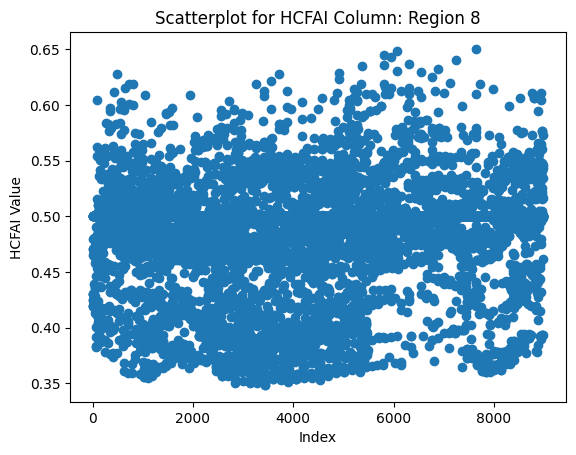

In [15]:
# Scatterplot for the 'HCFAI' column
plt.scatter(x.index, x['HCFAI'])
plt.title(f'Scatterplot for HCFAI Column: Region {region-1}')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Feasibility Factors

In [ ]:
# a = a['buildability_landcov'].notna()
a = df[['Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov',
       'drought_value', 'rain intensity_value', 'flood_probability_value', 'HCFAI']]

a = a[a['RHU_Presence']==0]
a = a.sort_values(by='HCFAI', ascending=False)
a

,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5048,1,1,0,1.0,0.960775,0.430949,0.687815,0.654064
2596,1,1,0,1.0,1.141953,0.249932,0.361025,0.651058
1121,1,1,0,1.0,1.111672,0.289567,0.461596,0.650529
5267,1,0,0,1.0,0.848824,0.427353,0.224119,0.645940
5194,1,0,0,1.0,0.848824,0.427353,0.224119,0.645939
...,...,...,...,...,...,...,...,...
5590,0,0,0,NaN,1.046655,0.516940,0.426333,NaN
5591,0,0,0,NaN,1.088014,0.533677,0.440750,NaN
5596,1,1,0,NaN,0.864514,2.721783,0.598195,NaN
5680,0,1,0,NaN,0.797894,2.648136,1.438344,NaN


# Maximal Coverage Factors

In [ ]:
b = df[['popden_you', 'popden_wom', 'popden_eld', 'popden_chi',
       'popden_w_1', 'popden_all', 'Distance_to_Nearest_RHU_km', 'RHU_Presence', 'HCFAI']]
# b = b[b['buildability_landcov']==1]
b = b.sort_values(by='HCFAI', ascending=False)
# b[b['RHU_Presence']==1]
b

,popden_you,popden_wom,popden_eld,popden_chi,popden_w_1,popden_all,Distance_to_Nearest_RHU_km,RHU_Presence,HCFAI
5048,13.736079,41.149321,8.824771,8.173794,20.816993,363.896997,17.384668,0,0.654064
2596,5.296137,14.032293,2.747063,3.143041,6.904777,155.815402,31.481358,0,0.651058
1121,28.689414,77.553834,12.481618,19.290638,36.829012,125.914306,11.550333,0,0.650529
5267,0.000000,0.000000,0.000000,0.000000,0.000000,41.771628,25.204817,0,0.645940
5194,0.000000,0.000000,0.000000,0.000000,0.000000,124.261193,23.798066,0,0.645939
...,...,...,...,...,...,...,...,...,...
5590,0.000000,0.000000,0.000000,0.000000,0.000000,176.080449,19.736373,0,NaN
5591,0.000000,0.000000,0.000000,0.000000,0.000000,27.348926,19.029579,0,NaN
5596,46.984025,121.805750,14.989535,29.475215,64.996635,370.507160,15.552309,0,NaN
5680,0.000000,0.000000,0.000000,0.000000,0.000000,4.127558,18.802216,0,NaN


# EDA

In [ ]:
c=df['HCFAI'].notna()
c = df[c]
# c = df[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
#        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
#         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
#         'flood_probability_value', 'HCFAI']]
# c = c[c['RHU_Presence']==1]
c = c.sort_values(by='HCFAI', ascending=False)
c = c[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
       'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
        'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
        'flood_probability_value', 'HCFAI']]
c.sort_values(by='HCFAI', ascending=False)

,population_youth,population_women,population_elder60plus,population_children_under5,population_reproductive_women,popden_all_total_population,Distance_to_Nearest_RHU_km,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5703,0.000000,0.000000,0.0,0.000000,0.000000,376.429135,18.697599,1,0,0,1.0,0.542848,2.371210,0.962631,0.581876
1099,0.000000,0.000000,0.0,0.000000,0.000000,466.445625,24.862448,0,0,0,1.0,0.672856,0.268539,0.305392,0.563102
4334,0.000000,0.000000,0.0,0.000000,0.000000,1139.223628,29.861002,0,0,0,1.0,0.713175,0.153043,0.229447,0.534900
2704,0.000000,0.000000,0.0,0.000000,0.000000,23.816927,10.621421,0,0,0,1.0,0.834131,0.092033,0.815355,0.521743
3490,0.000000,0.000000,0.0,0.000000,0.000000,693.544396,13.991199,0,0,0,1.0,0.884191,0.099185,0.681102,0.516955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,11520.305136,21600.533088,0.0,2880.050256,12960.330264,50247.186329,2.858075,0,0,0,0.0,0.783897,2.857803,0.389312,0.481524
3937,0.000000,0.000000,0.0,0.000000,0.000000,2736.210123,11.314957,0,0,0,1.0,0.795406,1.766906,1.284616,0.480502
944,0.000000,0.000000,0.0,0.000000,0.000000,5875.884038,10.289214,0,0,0,0.0,0.686629,0.277878,0.934151,0.473992
5,0.000000,0.000000,0.0,0.000000,0.000000,4021.250203,16.685262,0,0,0,0.0,0.800627,1.151205,0.700863,0.467737


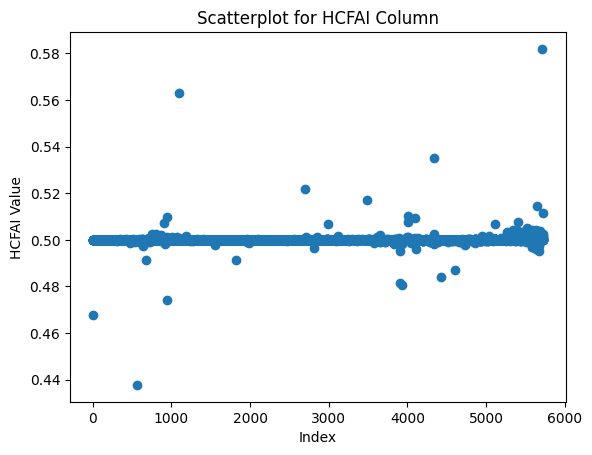

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(c.index, c['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Exporting

In [16]:
# Specify the file path for the CSV file
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)
print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: /content/drive/MyDrive/MS thesis/HFCAI/RG9/rg9_HCFAI_sum.csv
